In [428]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter



Reading Both Files as Dataframes

In [429]:
df=pd.read_csv('NormalSituation.csv')
df2=pd.read_excel('pandemic_dataset.xlsx')

In [430]:
df2['Date Flown']=df2['Date Flown'].astype(str)

Concatinating the second data frame with First

In [431]:
prep=pd.concat([df, df2],axis=0)

In [432]:
prep.shape

(3886, 17)

In [433]:
prep.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,Aircraft,reviews,month,year,month_year
0,Couple Leisure,Premium Economy,New York JFK to Heathrow,2023-03-01 00:00:00,1.0,2.0,2.0,2.0,3.0,1,no,NaN,NaN,Not Verified | We were flying World Traveller...,3.0,2023.0,3.0/2023.0
1,Solo Leisure,Economy Class,Dublin to Orlando via Heathrow,2022-12-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1,no,1.0,NaN,Not Verified | This was literally one of the ...,12.0,2022.0,12.0/2022.0
2,Family Leisure,Economy Class,London Heathrow to Munich,2023-03-01 00:00:00,1.0,1.0,1.0,NaN,1.0,1,no,NaN,NaN,✅ Trip Verified | The usual shambolic unfoldi...,3.0,2023.0,3.0/2023.0
3,Business,Business Class,London to Dubai,2022-12-01 00:00:00,4.0,4.0,4.0,4.0,1.0,1,no,4.0,NaN,Not Verified | Lost my case and took 6 weeks ...,12.0,2022.0,12.0/2022.0
4,Solo Leisure,Economy Class,Geneva to London,2023-03-01 00:00:00,2.0,3.0,3.0,NaN,1.0,2,no,NaN,A320,✅ Trip Verified | The incoming and outgoing f...,3.0,2023.0,3.0/2023.0


In [434]:
prep['Recommended'] = prep['Recommended'].fillna('yes')

In [435]:
prep['Recommended'] = prep['Recommended'].replace({'yes': 1, 'no': 0})

In [436]:
prep=prep.drop(['month_year'],axis=1)
prep=prep.drop(['Type Of Traveller'],axis=1)

In [437]:
prep=prep.drop(['month'],axis=1)

In [438]:
prep=prep.drop(['year'],axis=1)
prep=prep.drop(['Route'],axis=1)

In [439]:
mean_wc=prep['Wifi & Connectivity'].mean()
prep['Wifi & Connectivity'].fillna(mean_wc,inplace=True)

In [440]:
prep['Wifi & Connectivity'] = prep['Wifi & Connectivity'].round(0)

In [441]:
mean_GS = prep['Ground Service'].mean()
prep['Ground Service'].fillna(mean_GS, inplace=True)
mean_vm=prep['Value For Money'].mean()
prep['Value For Money'].fillna(mean_vm,inplace=True)
mean_sc=prep['Seat Comfort'].mean()
prep['Seat Comfort'].fillna(mean_sc,inplace=True)
mean_csc=prep['Cabin Staff Service'].mean()
prep['Cabin Staff Service'].fillna(mean_csc,inplace=True)
mean_fb=prep['Food & Beverages'].mean()
prep['Food & Beverages'].fillna(mean_fb,inplace=True)
mean_ife=prep['Inflight Entertainment'].mean()
prep['Inflight Entertainment'].fillna(mean_ife,inplace=True)

mean_wc=prep['Wifi & Connectivity'].mean()
prep['Wifi & Connectivity'].fillna(mean_wc,inplace=True)

In [442]:
prep['Seat Type'].unique()

array(['Premium Economy', 'Economy Class', 'Business Class',
       'First Class', nan], dtype=object)

In [443]:
prep['Ground Service'] = prep['Ground Service'].round(0)
prep['Value For Money'] = prep['Value For Money'].round(0)
prep['Cabin Staff Service'] = prep['Cabin Staff Service'].round(0)
prep['Food & Beverages'] = prep['Food & Beverages'].round(0)
prep['Inflight Entertainment'] = prep['Inflight Entertainment'].round(0)

prep['Seat Comfort'] = prep['Seat Comfort'].round(0)
prep = prep[prep['Seat Type'].isin(['Economy Class', 'Business Class','Premium Economy','First Class'])]

In [444]:
prep['Date Flown'].fillna('2020-04-05',inplace=True)


In [445]:
prep=prep.drop(['Aircraft'],axis=1)

In [446]:
prep['Wifi & Connectivity'] = prep['Wifi & Connectivity'].round(2)

In [447]:
prep['Cabin Staff Service'].fillna('4', inplace=True)

In [448]:
prep['Seat Comfort'].fillna('3', inplace=True)

In [449]:
prep['Cabin Staff Service'].fillna('3', inplace=True)
prep['Food & Beverages'].fillna('4', inplace=True)
prep['Inflight Entertainment'].fillna('4', inplace=True)
prep['Ground Service'].fillna('3', inplace=True)

In [450]:
prep

,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews
0,Premium Economy,2023-03-01 00:00:00,1.0,2.0,2.0,2.0,3.0,1,0,2.0,Not Verified | We were flying World Traveller...
1,Economy Class,2022-12-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1,0,1.0,Not Verified | This was literally one of the ...
2,Economy Class,2023-03-01 00:00:00,1.0,1.0,1.0,3.0,1.0,1,0,2.0,✅ Trip Verified | The usual shambolic unfoldi...
3,Business Class,2022-12-01 00:00:00,4.0,4.0,4.0,4.0,1.0,1,0,4.0,Not Verified | Lost my case and took 6 weeks ...
4,Economy Class,2023-03-01 00:00:00,2.0,3.0,3.0,3.0,1.0,2,0,2.0,✅ Trip Verified | The incoming and outgoing f...
...,...,...,...,...,...,...,...,...,...,...,...
386,Economy Class,2019-03-01,3.0,2.0,3.0,3.0,1.0,2,0,2.0,✅ Trip Verified | Cologne to Gatwick in econo...
387,Economy Class,2019-03-01,2.0,2.0,2.0,2.0,1.0,1,0,2.0,✅ Trip Verified | Tampa to Gatwick. I paid to...
388,Economy Class,2019-03-01,5.0,5.0,3.0,3.0,5.0,5,1,2.0,✅ Trip Verified | London Heathrow to Madrid. I...
389,Business Class,2019-03-01,1.0,4.0,2.0,3.0,3.0,1,0,2.0,✅ Trip Verified | _x000D_\nLondon Heathrow / P...


In [451]:
prep.head()

,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews
0,Premium Economy,2023-03-01 00:00:00,1.0,2.0,2.0,2.0,3.0,1,0,2.0,Not Verified | We were flying World Traveller...
1,Economy Class,2022-12-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1,0,1.0,Not Verified | This was literally one of the ...
2,Economy Class,2023-03-01 00:00:00,1.0,1.0,1.0,3.0,1.0,1,0,2.0,✅ Trip Verified | The usual shambolic unfoldi...
3,Business Class,2022-12-01 00:00:00,4.0,4.0,4.0,4.0,1.0,1,0,4.0,Not Verified | Lost my case and took 6 weeks ...
4,Economy Class,2023-03-01 00:00:00,2.0,3.0,3.0,3.0,1.0,2,0,2.0,✅ Trip Verified | The incoming and outgoing f...


In [452]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3884 entries, 0 to 390
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Seat Type               3884 non-null   object 
 1   Date Flown              3884 non-null   object 
 2   Seat Comfort            3884 non-null   float64
 3   Cabin Staff Service     3884 non-null   float64
 4   Food & Beverages        3884 non-null   float64
 5   Inflight Entertainment  3884 non-null   float64
 6   Ground Service          3884 non-null   float64
 7   Value For Money         3884 non-null   int64  
 8   Recommended             3884 non-null   int64  
 9   Wifi & Connectivity     3884 non-null   float64
 10  reviews                 3884 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 364.1+ KB


In [453]:
prep.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity
count,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000
mean,2.904995,3.275489,2.776777,2.774459,2.881565,2.722966,0.414264,1.996138
std,1.342269,1.462663,1.367503,1.180408,1.291179,1.476916,0.492658,0.546791
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,2.000000
75%,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,1.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000


In [454]:
prep.describe(include='all')

,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews
count,3884,3884,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000,3884
unique,4,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3492
top,Economy Class,2020-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,✅ Trip Verified | Hong Kong to Copenhagen via...
freq,2030,777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,2.904995,3.275489,2.776777,2.774459,2.881565,2.722966,0.414264,1.996138,NaN
std,NaN,NaN,1.342269,1.462663,1.367503,1.180408,1.291179,1.476916,0.492658,0.546791,NaN
min,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,NaN,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,2.000000,NaN
50%,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,2.000000,NaN
75%,NaN,NaN,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,1.000000,2.000000,NaN


In [455]:
# Select only the columns with object or category data types
categorical_columns = prep.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)


['Seat Type', 'Date Flown', 'reviews']


In [456]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode the categorical variable
prep['Seat Type'] = le.fit_transform(prep['Seat Type'])


In [457]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode the categorical variable
prep['reviews'] = le.fit_transform(prep['reviews'])

In [458]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode the categorical variable
prep['Date Flown'] = le.fit_transform(prep['Date Flown'])


In [459]:
prep

,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews
0,3,128,1.0,2.0,2.0,2.0,3.0,1,0,2.0,1298
1,1,125,1.0,1.0,1.0,1.0,1.0,1,0,1.0,1286
2,1,128,1.0,1.0,1.0,3.0,1.0,1,0,2.0,2367
3,0,125,4.0,4.0,4.0,4.0,1.0,1,0,4.0,1250
4,1,128,2.0,3.0,3.0,3.0,1.0,2,0,2.0,2360
...,...,...,...,...,...,...,...,...,...,...,...
386,1,56,3.0,2.0,3.0,3.0,1.0,2,0,2.0,1826
387,1,56,2.0,2.0,2.0,2.0,1.0,1,0,2.0,2345
388,1,56,5.0,5.0,3.0,3.0,5.0,5,1,2.0,2587
389,0,56,1.0,4.0,2.0,3.0,3.0,1,0,2.0,2694


In [460]:
print(sorted(Counter(prep['Recommended']).items()))

[(0, 2275), (1, 1609)]


In [461]:

pip install imblearn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Lodhi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [462]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Separate majority and minority classes
majority_class = prep[prep.Recommended==0]
minority_class = prep[prep.Recommended==1]

# Oversample minority class
oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(prep.drop('Recommended', axis=1), prep['Recommended'])
oversampled_prep = pd.concat([X, y], axis=1)

# Undersample majority class
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(oversampled_prep.drop('Recommended', axis=1), oversampled_prep['Recommended'])
balanced_prep = pd.concat([X, y], axis=1)


In [463]:
print(sorted(Counter(balanced_prep['Recommended']).items()))

[(0, 2275), (1, 2275)]


In [464]:
print(balanced_prep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Seat Type               4550 non-null   int32  
 1   Date Flown              4550 non-null   int32  
 2   Seat Comfort            4550 non-null   float64
 3   Cabin Staff Service     4550 non-null   float64
 4   Food & Beverages        4550 non-null   float64
 5   Inflight Entertainment  4550 non-null   float64
 6   Ground Service          4550 non-null   float64
 7   Value For Money         4550 non-null   int64  
 8   Wifi & Connectivity     4550 non-null   float64
 9   reviews                 4550 non-null   int32  
 10  Recommended             4550 non-null   int64  
dtypes: float64(6), int32(3), int64(2)
memory usage: 337.8 KB
None


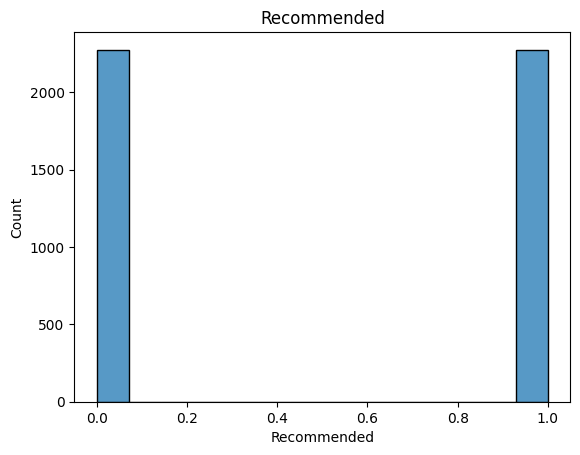

In [465]:
sns.histplot(balanced_prep.Recommended)
plt.title('Recommended')
plt.show()

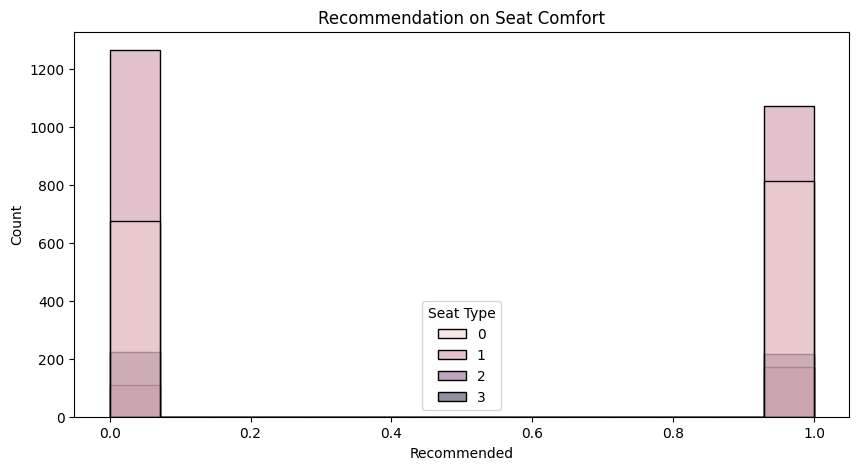

In [466]:
plt.figure(figsize=(10,5))
plt.title("Recommendation on Seat Comfort")
sns.histplot(x="Recommended", hue ="Seat Type", data=balanced_prep)
plt.show()

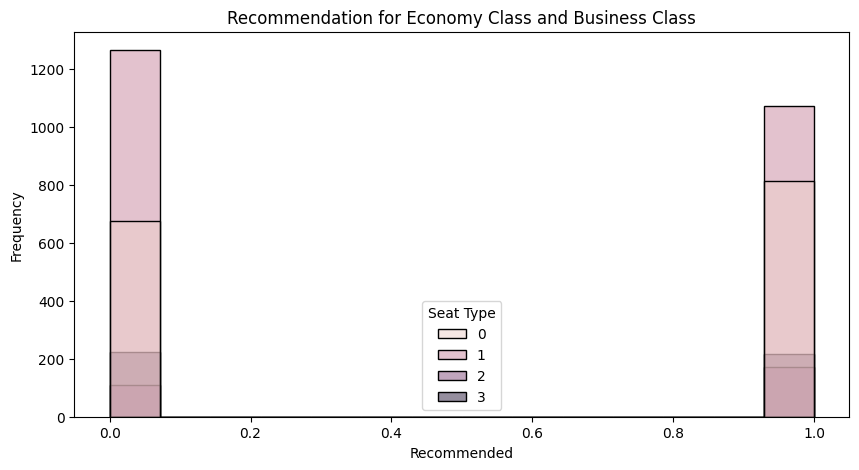

In [467]:
plt.figure(figsize=(10,5))
plt.title("Recommendation for Economy Class and Business Class")
sns.histplot(x="Recommended", hue="Seat Type", data=balanced_prep, hue_order=["Economy Class", "Business Class"])
plt.xlabel("Recommended")
plt.ylabel("Frequency")
plt.show()


In [468]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [469]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [470]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the decision tree classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameters to search over
params = {'max_depth': [3, 5, 10],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 5]}

# Perform a grid search over the hyperparameters using cross-validation
grid = GridSearchCV(dtc, params, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters:", grid.best_params_)
y_pred = grid.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.9120879120879121


In [471]:
from sklearn.metrics import confusion_matrix, f1_score

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)

print("Confusion matrix for GridSearchCV:\n", cm)
print("F1 score:", f1)


Confusion matrix for GridSearchCV:
 [[637  58]
 [ 62 608]]
F1 score: 0.9101796407185629


In [472]:

# Train decision tree on entire dataset
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=10)
dt.fit(X_train, y_train)

# Evaluate performance on test set
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)


Test accuracy: 0.9062271062271062


In [473]:
cm = confusion_matrix(y_test, y_pred)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)

print("Confusion matrix For Decision Tree:\n", cm)
print("F1 score: ", f1)

Confusion matrix For Decision Tree:
 [[616  79]
 [ 49 621]]
F1 score:  0.9065693430656934


In [474]:
from sklearn.metrics import classification_report

# Generate predictions on the test set
y_pred = dt.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification report:\n", report)


Classification report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       695
           1       0.89      0.93      0.91       670

    accuracy                           0.91      1365
   macro avg       0.91      0.91      0.91      1365
weighted avg       0.91      0.91      0.91      1365



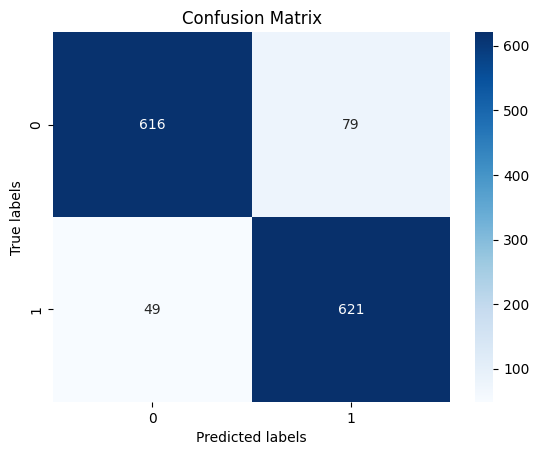

In [475]:
#import seaborn as sns
#import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
y_pred = dt.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()


In [476]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate performance on test set
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", round(accuracy,2))

# Compute precision, recall, and F1-score for recommended class
precision_recommended = precision_score(y_test, y_pred, pos_label=1)
recall_recommended = recall_score(y_test, y_pred, pos_label=1)
f1_recommended = f1_score(y_test, y_pred, pos_label=1)

print("Precision:", round(precision_recommended,2))
print("Recall:", round(recall_recommended,2))
print("F1-score:", round(f1_recommended,2))



Test accuracy: 0.91
Precision: 0.89
Recall: 0.93
F1-score: 0.91
